## Credit EDA Case Study

##### Summary of the Problem Statement:

This assignment focuses on Exploratory Data Analysis (EDA) in the context of risk analytics in banking and financial services. The scenario involves a consumer finance company specializing in lending various types of loans to urban customers. The company faces two types of risks when deciding on loan approvals: approving loans for clients who are likely to default, leading to financial losses, and rejecting loans for clients capable of repayment, resulting in a loss of business.

The objective of this case study is to use EDA to identify patterns that indicate if a client may have difficulty paying their loan installments. By understanding the driving factors behind loan defaults, the company can take appropriate actions such as denying loans, reducing loan amounts, or offering loans at higher interest rates to risky applicants.

The dataset contains three files: 'application_data.csv' with client information at the time of loan application, 'previous_application.csv' with data on the client's previous loan applications, and 'columns_description.csv' providing a data dictionary for variable meanings.

##### The expected results from the analysis are as follows:

- Present an overall approach in a presentation, summarizing the problem statement and analysis approach.
- Identify missing data and use appropriate methods to deal with it, either by removing columns or replacing missing values.
- Identify outliers in the dataset and explain why they are considered outliers.
- Analyze data imbalance, especially in the 'Target variable,' and find the ratio of data imbalance using a mix of univariate and bivariate analysis.
- Explain the results of univariate, segmented univariate, and bivariate analysis in business terms.
- Include visualizations and summarize the most important results in the presentation, explaining why certain variables are essential for differentiating clients with payment difficulties from others.
- The analysis and visualizations should be done using Python in Jupyter Notebooks, while the presentation file should be in PDF format and contain the necessary points discussed above with the relevant visualizations.

Overall, the goal is to use EDA techniques to gain insights into client behavior and attributes that contribute to loan defaults, enabling the company to make informed decisions to minimize risk and optimize its loan portfolio.

In [114]:
#importing Libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt , seaborn as sns

#importing warnings
import warnings
warnings.filterwarnings('ignore')

#setting up a view to look into all the rows and columns of data set
pd.set_option("display.max_rows", None) #to display all
pd.set_option("display.max_columns", None) #to display all

#setting up a style for sns
sns.set_style("whitegrid") 

In [115]:
#Data loading

#Loading Application Data
appdata=pd.read_csv('application_data.csv',encoding='Unicode_escape')

#Loading Previous Application Data
predata=pd.read_csv('previous_application.csv',encoding='Unicode_escape')

## Working on Application Data set for now which is appdata

In [116]:
#Looking into the application dataset 
appdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [117]:
#Shape Check of the data
appdata.shape

(307511, 122)


We have observed that the application data has:
- 307511 Rows
- 122 Columns



As we can see, the columns are many, and we cannot analyze them all, and there is no point in doing that as all the columns are not full.

- We will check the null percentage and set the cutoff above that all the cases will be dropped.
- Look into the remaining columns and match them with the column description data set, as there will be still unnecessarily many columns, and again, we will drop them.
- We will try to minimize the columns as much as possible so that we have good data to analyze, not the unnecessary.


In [118]:
#checking the null value percentage in each columns
appdata.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [119]:
# Lets check the data in descending wise
(appdata.isnull().mean()*100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [120]:
# Setting up a cutoff of 40% . The null%>40 will be dropped

cutoff=40
col_to_drop=appdata.columns[appdata.isnull().mean()*100>40]

#Number of column which will be dropped
print(len(col_to_drop),' number of columns will be dropped form the appdata')

49  number of columns will be dropped form the appdata


In [121]:
#Dropping all 49 columns from the application dataset
appdata.drop(col_to_drop,axis=1,inplace=True)

#Checking the new shape of the data 
print('The dataset have ',appdata.shape[0],'numbers of rows and the column decreased to ',appdata.shape[1],'in numbers.')

The dataset have  307511 numbers of rows and the column decreased to  73 in numbers.


In [122]:
# As we have bring columns from 122 to 73, we will decrease more because it still have unwanted columns 

#Checking the columns of appdata and then will match with the description of the data and by the help of the domain knowledge and own understanding we are going to drop them .
appdata.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C


We have looked into the column description file in Excel and have marked all the columns with a yellow color that we found not useful or unwanted as per our knowledge and understanding.

- Filter the column by color.
- Stored that in the variable
- Then used.replace and.split to extract and bring that into useable form.

Now that we have the list of the columns from whom we will either drop and handle the Nan,


In [123]:
# Now removing the columns from the data set which are unused for better analysis
exe_col = "FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3 APARTMENTS_AVG BASEMENTAREA_AVG YEARS_BEGINEXPLUATATION_AVG YEARS_BUILD_AVG COMMONAREA_AVG ELEVATORS_AVG ENTRANCES_AVG FLOORSMAX_AVG FLOORSMIN_AVG LANDAREA_AVG LIVINGAPARTMENTS_AVG LIVINGAREA_AVG NONLIVINGAPARTMENTS_AVG NONLIVINGAREA_AVG APARTMENTS_MODE BASEMENTAREA_MODE YEARS_BEGINEXPLUATATION_MODE YEARS_BUILD_MODE COMMONAREA_MODE ELEVATORS_MODE ENTRANCES_MODE FLOORSMAX_MODE FLOORSMIN_MODE LANDAREA_MODE LIVINGAPARTMENTS_MODE LIVINGAREA_MODE NONLIVINGAPARTMENTS_MODE NONLIVINGAREA_MODE APARTMENTS_MEDI BASEMENTAREA_MEDI YEARS_BEGINEXPLUATATION_MEDI YEARS_BUILD_MEDI COMMONAREA_MEDI ELEVATORS_MEDI ENTRANCES_MEDI FLOORSMAX_MEDI FLOORSMIN_MEDI LANDAREA_MEDI LIVINGAPARTMENTS_MEDI LIVINGAREA_MEDI NONLIVINGAPARTMENTS_MEDI NONLIVINGAREA_MEDI FONDKAPREMONT_MODE HOUSETYPE_MODE TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE FLAG_DOCUMENT_2 FLAG_DOCUMENT_3 FLAG_DOCUMENT_4 FLAG_DOCUMENT_5 FLAG_DOCUMENT_6 FLAG_DOCUMENT_7 FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_DOCUMENT_10 FLAG_DOCUMENT_11 FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR"

# Replace spaces with commas and create a new list of column names
unwanted_col = exe_col.replace(' ', ',').split(',')
print(unwanted_col)


['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGARE


We have filtered the data from the column description and made up a list of columns that we want to drop, but there are some repetitions of the columns as we have already dropped some of them while dropping all the columns whose null percentage was more than 40%.

To avoid the repetition of the name of the column name and further errors, we are using set operations.

-  Set difference operation
   This will give us the elements that are present in 'unwanted_col' but not in 'col_to_drop'
- Converted the unwanted column into a set
- Converted the col_to_drop into a set

Took out the difference and stored it in the variable named 'un_col'. un_col has all the column names that were not dropped earlier but need to be dropped.


In [124]:
#Converting the unwanted_col to set
unwanted_col=set(unwanted_col)
#Converting the col_to_drop to set
col_to_drop=set(col_to_drop)

#difference of the columns 
un_col= list(unwanted_col - col_to_drop)

#The number of columns which we will be dropped 
len(un_col)

39

In [125]:
#dropping the un_col from appdata
appdata.drop(un_col,axis=1,inplace=True)

#New shape of the data 
print('The dataset have ',appdata.shape[0],'numbers of rows and the column decreased to ',appdata.shape[1],'in numbers.')

The dataset have  307511 numbers of rows and the column decreased to  34 in numbers.


### Missing Value Treatment 

As we have eliminated all the unwanted columns and the columns with null%>40. Now we are going to treat Missing values in the dataset.

In [126]:
#Let's arrange and look for the column with null value
null_col=appdata.isnull().sum()
null_col.sort_values(ascending=False)

OCCUPATION_TYPE                96391
NAME_TYPE_SUITE                 1292
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
LIVE_REGION_NOT_WORK_REGION        0
REG_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_LIVE_REGION         0
DAYS_REGISTRATION                  0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
REGION_RATING_CLIENT_W_CITY        0
REGION_RATING_CLIENT               0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
FLAG_MOBIL                         0
DAYS_ID_PUBLISH                    0
SK_ID_CURR                         0
DAYS_EMPLOYED                      0
TARGET                             0
REGION_POPULATION_RELATIVE         0
NAME_HOUSING_TYPE                  0
NAME_FAMILY_STATUS                 0
NAME_EDUCATION_TYPE                0
NAME_INCOME_TYPE                   0
AMT_CREDIT                         0
A

In [127]:
#Looking into null percentage for better understanding 
(appdata.isnull().mean()*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
NAME_TYPE_SUITE                 0.420148
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
DAYS_REGISTRATION               0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
REGION_RATING_CLIENT            0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
FLAG_MOBIL                      0.000000
DAYS_ID_PUBLISH                 0.000000
SK_ID_CURR                      0.000000
DAYS_EMPLOYED                   0.000000
TARGET                          0.000000
REGION_POPULATION_RELATIVE      0.000000
NAME_HOUSING_TYPE               0.000000
NAME_FAMILY_STATUS              0.000000
NAME_EDUCATION_T


We have 6 columns with null values left in them, out of which 5 are minor, and one column with major value, which is OCCUPATION_TYPE, as it is the important column with no missing value in it. A fill-up with the mode might devastate our analysis, so it's better to handle other null values first, then we will introduce the type in the column OCCUPATION_TYPE as 'Unknown'.


In [128]:
#Checking the data type of the column 'NAME_TYPE_SUITE'
appdata.NAME_TYPE_SUITE.dtypes

dtype('O')

In [129]:
#Looking in THE data that what is stored in it 
appdata.NAME_TYPE_SUITE.head()

0    Unaccompanied
1           Family
2    Unaccompanied
3    Unaccompanied
4    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [130]:
#By looking above we can say the data type is correct of the column NAME_TYPE_SUITE

#As it is categorical so we will use mode to fill na
mode_value=appdata['NAME_TYPE_SUITE'].mode().iloc[0]
appdata['NAME_TYPE_SUITE'] = appdata['NAME_TYPE_SUITE'].fillna(mode_value)

In [131]:
#Checking the data type of the column 'AMT_GOODS_PRICE'
appdata.AMT_GOODS_PRICE.dtypes

dtype('float64')

In [132]:
#Looking in THE data that what is stored in it 
appdata.AMT_GOODS_PRICE.head()

0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [133]:
#By looking above we can say the data type is correct of the column AMT_GOODS_PRICE

#As it is continuous and na% is very less so we will use median to fill na
median_value = appdata['AMT_GOODS_PRICE'].median()
appdata['AMT_GOODS_PRICE'].fillna(median_value, inplace=True)

In [134]:
#Checking the data type of the column 'AMT_ANNUITY'
appdata.AMT_ANNUITY.dtypes

dtype('float64')

In [135]:
#Looking in THE data that what is stored in it 
appdata.AMT_ANNUITY.head()

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64

In [136]:
#By looking above we can say the data type is correct of the column AMT_ANNUITY

#As it is continuous and na% is very less so we will use median to fill na
median_value = appdata['AMT_ANNUITY'].median()
appdata['AMT_ANNUITY'].fillna(median_value, inplace=True)

In [137]:
#Checking the data type of the column 'CNT_FAM_MEMBERS'
appdata.CNT_FAM_MEMBERS.dtypes

dtype('float64')

In [138]:
#Looking in THE data that what is stored in it 
appdata.CNT_FAM_MEMBERS.head()

0    1.0
1    2.0
2    1.0
3    2.0
4    1.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [139]:
#As it is continuous and na% is very less so we will use median to fill na
median_value = appdata['CNT_FAM_MEMBERS'].median()
appdata['CNT_FAM_MEMBERS'].fillna(median_value, inplace=True)

#As looking at the columns description it is stated that CNT_FAM_MEMBERS means 'How many family members does client have' , so it should be stored in int not in float.

#Changing the datatype of CNT_FAM_MEMBERS
appdata['CNT_FAM_MEMBERS'] = appdata['CNT_FAM_MEMBERS'].astype(int)


In [140]:
#Checking the data type of the column 'DAYS_LAST_PHONE_CHANGE'
appdata.DAYS_LAST_PHONE_CHANGE.dtypes

dtype('float64')

In [141]:
#Looking in THE data that what is stored in it 
appdata.DAYS_LAST_PHONE_CHANGE.head()

0   -1134.0
1    -828.0
2    -815.0
3    -617.0
4   -1106.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [142]:
#As this column negative value changing all to absolute value 
appdata['DAYS_LAST_PHONE_CHANGE'] = appdata['DAYS_LAST_PHONE_CHANGE'].abs()


#As it is continuous and na% is very less so we will use median to fill na
median_value = appdata['DAYS_LAST_PHONE_CHANGE'].median()
appdata['DAYS_LAST_PHONE_CHANGE'].fillna(median_value, inplace=True)

In [143]:
#Data type check of the col OCCUPATION_TYPE 
appdata.OCCUPATION_TYPE.dtypes

dtype('O')

In [144]:
appdata.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [145]:
#Looking into column
appdata.OCCUPATION_TYPE.head()

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object

In [146]:
#Now handling the column with most null value which is OCCUPATION_TYPE 
#Creating new type in OCCUPATION_TYPE column as filling NA with mode (as it is categorical data) will be not good and can hamper our analysis 
appdata['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)


In [147]:
#Final check of null value in the dataset appdata
appdata.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_N

### Univariate and Bivariate Analysis

##### appdata (Application Dataset)


Before we move forward for Univariate and bivariate, we are going to segregate the columns into the continuous type of columns and the categorical type of columns, as it will be beneficial and help us perform viusalization better.

Using the concept of lists
Using for loop


In [148]:
#creating a blank list to store all continuous columns
con_col=[]

#Creating a blank list which will store all categorical columns 
cat_col=[]

#Loop starting 
for col in appdata:
    if appdata[col].dtypes=='object' or appdata[col].dtypes=='O':
        #store that col in cot_col
        cat_col.append(col)
    
    else:
        #store that col in con_col
        con_col.append(col)

In [149]:
#Looking into the columns which is continuous 
con_col

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE']

In [150]:
#Looking into the columns which is categorical 
cat_col

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']

In [151]:
# #Starting the analysis of the numerical col with the help of loop and box plot 

# for col in con_col[2:]:
#     #setting figure size for better visualization
#     plt.figure(figsize=(10,5)) 
#     #creating a box-whisker plot to visualize distribution
#     sns.boxplot(x=appdata[col])  
#     #labeling x
#     plt.title('Box Plot - {}'.format(col), fontsize =24)   
#     plt.xlabel('{} '.format(col),fontsize =18 ) 
#     #removing y label as it is not required here    
#     plt.ylabel('')      
#     #printing empty line after each iteration
#     print()    
#      #displays all plots at once    
#     plt.show();      
    
    


We can easily get the graphs of all the continuous columns with the help of a loop in one single code run.

But we are going to plot graphs manually as the boxplot for all the variables was not appropriate; hence, we will look into the variables and plot the graphs accordingly to get the maximum insights out of them, if any.


In [152]:
#Continuous column which will be analyzed 
con_col

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE']


We will not skip the 'SK_ID_CURR' because, as per the column description, it is the ID of loan in our sample'.

So we will not get any benefits from it, but we have kept it for the time of merging application data with previous application data.



In [153]:
#Starting our Analysis from TARGET column
appdata.TARGET.value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [154]:
#let's look this into percentage 
target_distribution = appdata['TARGET'].value_counts(normalize=True) * 100
print(target_distribution)

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


In [155]:
#Lets look for data imbalance

#Printing the ratio of the data imbalance and rounding it off up to two decimal points
print('The Ratio for data imbalance is ',round(target_distribution[0]/target_distribution[1],2))

The Ratio for data imbalance is  11.39


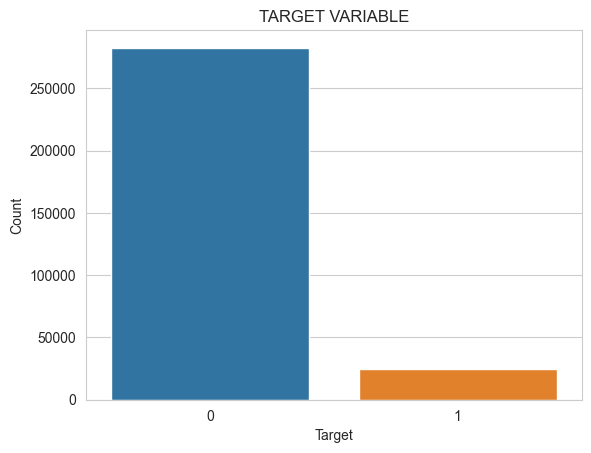

In [156]:
#Lets look into graph 
sns.countplot(x='TARGET',data=appdata)
plt.xlabel('Target')
plt.ylabel("Count")
plt.title('TARGET VARIABLE')
plt.show()

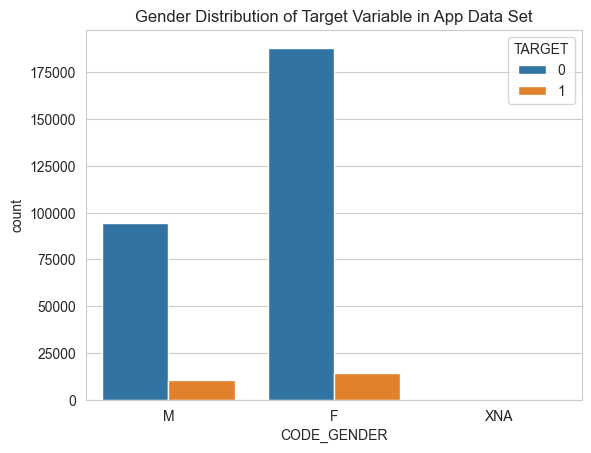

In [157]:
sns.countplot(data = appdata, x = "CODE_GENDER", hue = "TARGET")
plt.title("Gender Distribution of Target Variable in App Data Set");

#### Observation : 
It is evident from the graph above that men are more prone than women to default on their obligations. In other words, women would make better candidates for loan recipients.




- There are around 92% of people are regular with their payments.
- There are 8% of people with the payment difficulties.
- The Ratio for data imbalance is 11.39


In [158]:
# Analyzing the 'CNT_CHILDREN' column 
appdata.CNT_CHILDREN.value_counts()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: count, dtype: int64

In [159]:
#Lets see what happens with people who own a car
appdata.FLAG_OWN_CAR.value_counts()

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

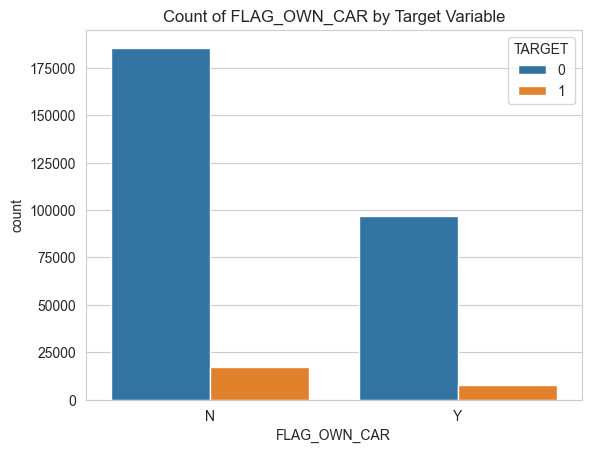

In [160]:
sns.countplot(data = appdata, x = "FLAG_OWN_CAR", hue = "TARGET")
plt.title("Count of FLAG_OWN_CAR by Target Variable")
plt.show()

#### Observation : 

People who possess a car have a higher percentage of defaulting on their loans. May be because of maintains . 



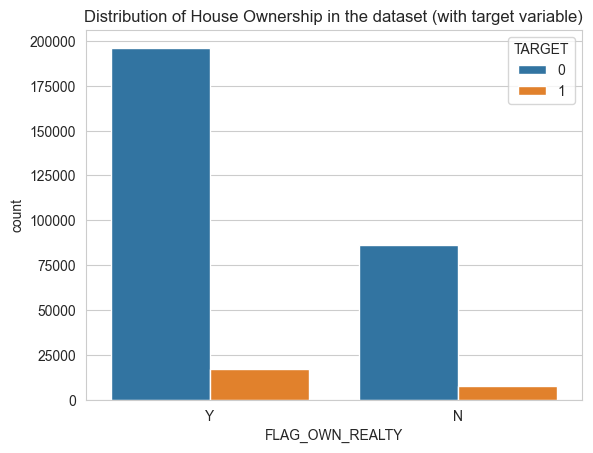

In [161]:
#Lets see what happens with people who own a house or flat
sns.countplot(data = appdata, x = "FLAG_OWN_REALTY", hue = "TARGET")
plt.title("Distribution of House Ownership in the dataset (with target variable)")
plt.show()

#### Observation:

Owners of immovable property, such as houses or apartments, are more likely to pay off their debt than those who do not.Perhaps those without a home or apartment believe that even if they default on their debt, the bank won't do any harm to them, and they can easily leave whenever they want. Another presumption we could make is that people who don't own homes must pay rent and incur higher expenses.


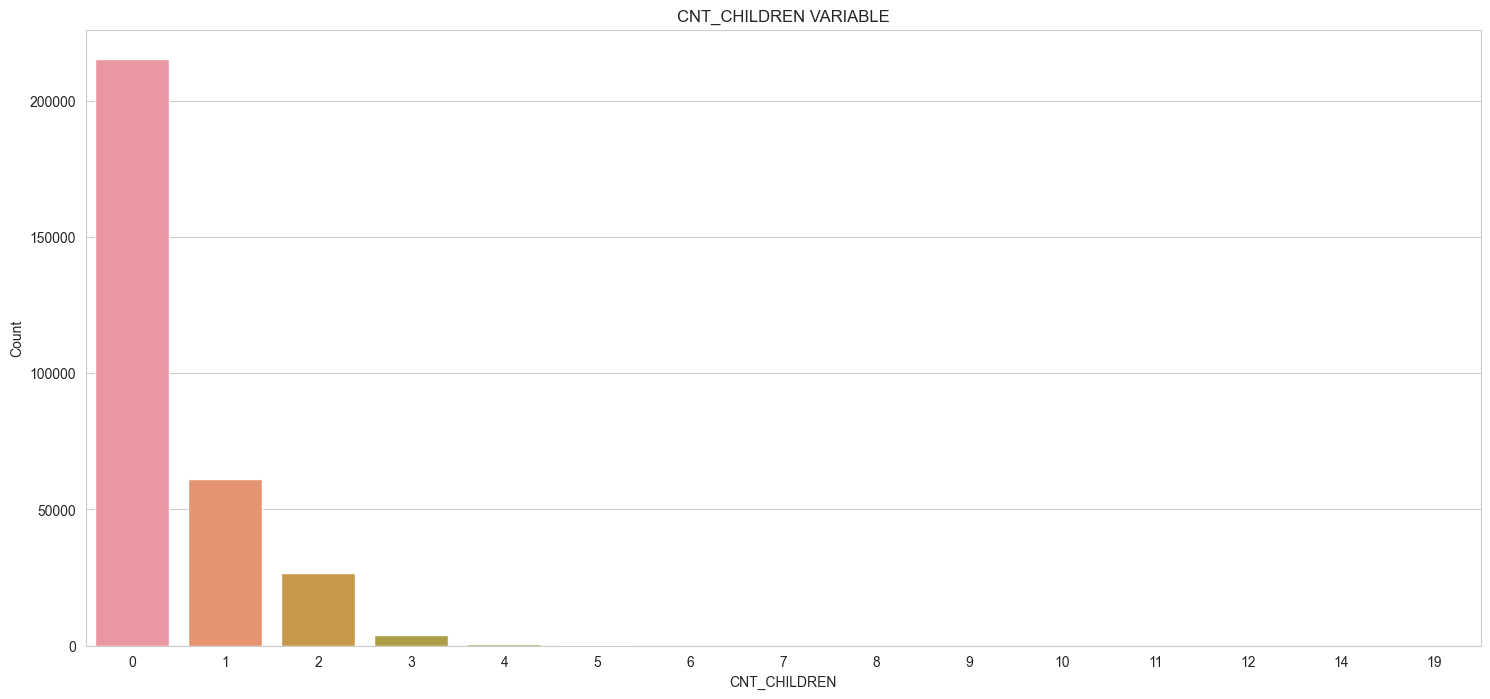

In [162]:
#Lets look into graph 
plt.figure(figsize=(18, 8))
sns.countplot(x='CNT_CHILDREN',data=appdata)
plt.xlabel('CNT_CHILDREN')
plt.ylabel("Count")
plt.title('CNT_CHILDREN VARIABLE')
plt.show()

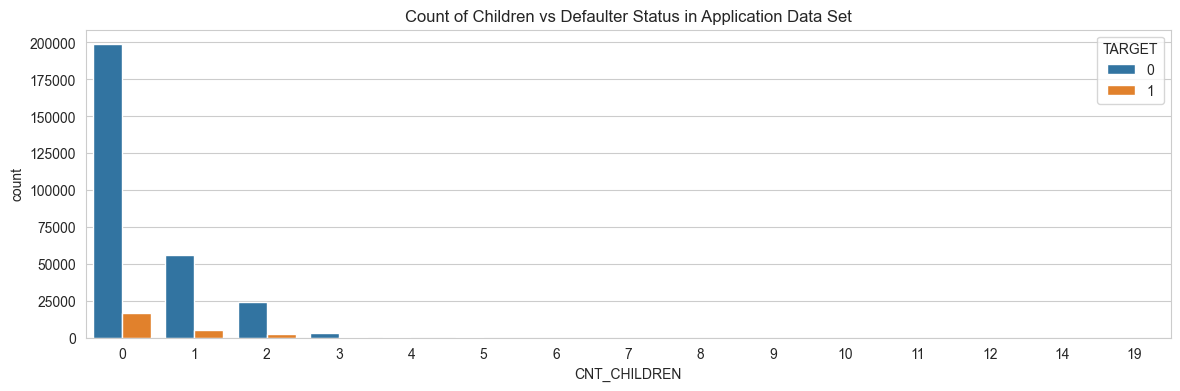

In [163]:
#Now lets see how count of children affects defaulters
plt.figure(figsize=[14,4])
sns.countplot(data = appdata, x = "CNT_CHILDREN", hue = "TARGET")
plt.title("Count of Children vs Defaulter Status in Application Data Set");



##### Observation:

- The applicants with zero child highest among all.
- Less child-parenting clients are more likely to repay their obligations. Lower the number of children, the greater the likelihood that the client will be the best choice.



In [164]:

appdata.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [165]:
#By above describe we are unable to figure out dividing the income in ranges 
appdata["income_group"]= pd.cut(appdata.AMT_INCOME_TOTAL,[0, 50000, 100000, 150000, 200000, 250000, 500000, 750000, 100000000], labels= ["<50k","50k-1L","1-1.5L","1.5-2L", "2-2.5L", "2.5-5L", "5-7.5L", "7.5L+"])

In [166]:
#Value count of income_group
appdata.income_group.value_counts()

income_group
1-1.5L    91591
1.5-2L    64307
50k-1L    59181
2-2.5L    48137
2.5-5L    37076
<50k       4517
5-7.5L     2058
7.5L+       643
Name: count, dtype: int64

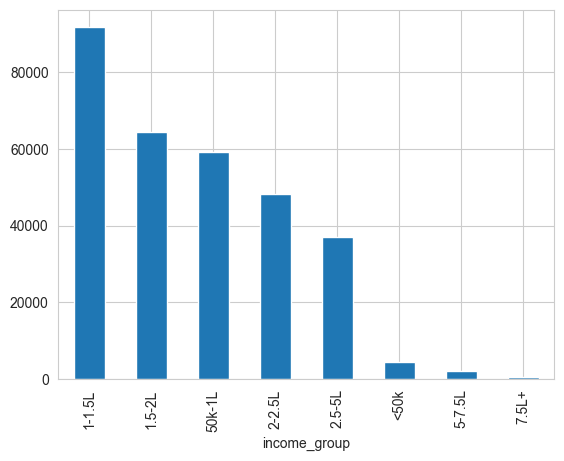

In [167]:
appdata.income_group.value_counts().plot.bar()
plt.show()

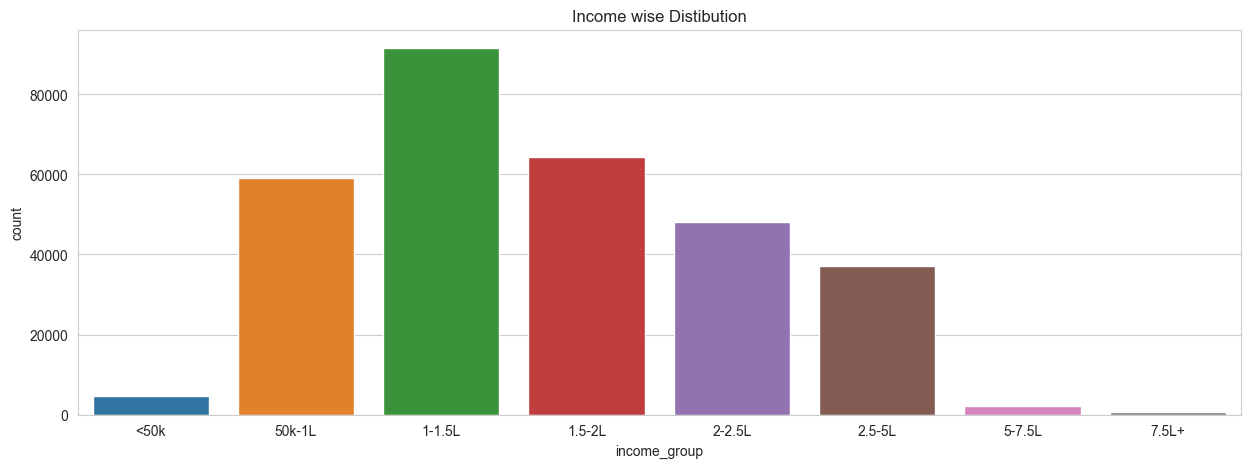

In [168]:
plt.figure(figsize=(15,5))
plt.title('Income wise Distibution')
sns.countplot(x='income_group',data=appdata)
plt.show()

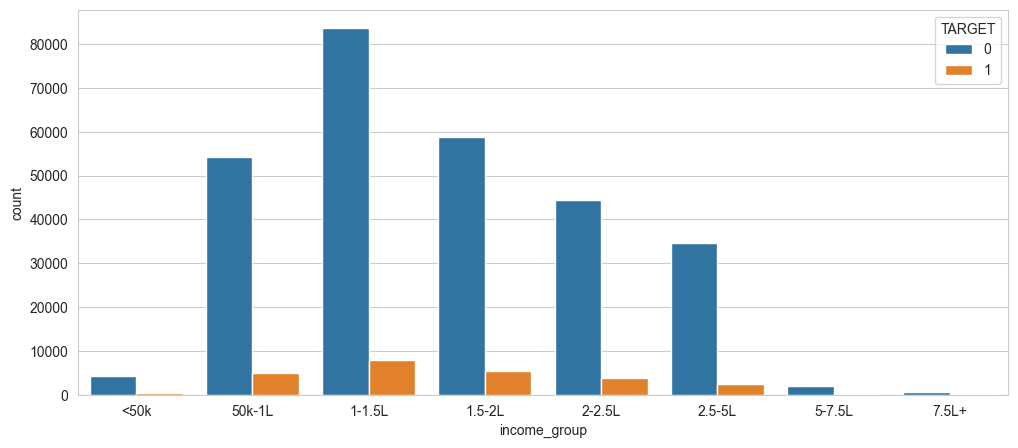

In [169]:
plt.figure(figsize=[12, 5])
sns.countplot(data = appdata, x = "income_group", hue = "TARGET")
plt.show()

#### Observation

- The most number of people lies in the income range of 1-1.5L
- The income group that pays off their debts most effectively has an income between one and five lakh rupees.


In [170]:
#Looking into the AMT_CREDIT column
appdata.AMT_CREDIT.head()

0     406597.5
1    1293502.5
2     135000.0
3     312682.5
4     513000.0
Name: AMT_CREDIT, dtype: float64

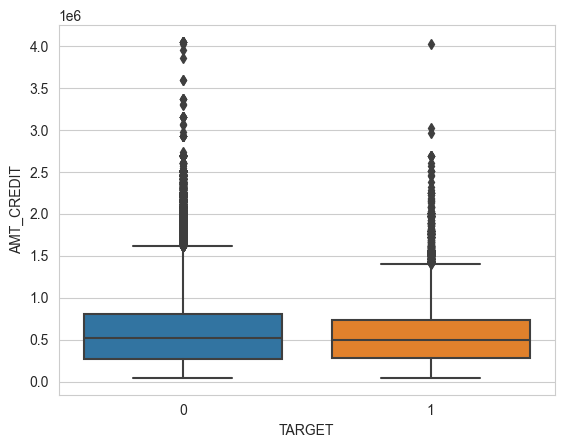

In [171]:
#lets see defaulters in those income groups
sns.boxplot(data=appdata,x="TARGET", y="AMT_CREDIT")
plt.show()

In [172]:
# first lets bin the credit amount

bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,10000000]
labels = ['0-1L','1-2L', '2-3L','3-4L','4-5L','5-6L','6-7L','7-8L', '8-9L','9-10L', '10L Above']
appdata['loan_amt_range']=pd.cut(appdata['AMT_CREDIT'],bins=bins,labels=labels)

In [173]:
# lets see percentage wise for more better clarity
appdata['loan_amt_range'].value_counts(normalize=True)

loan_amt_range
2-3L         0.178247
10L Above    0.162547
5-6L         0.111320
4-5L         0.104185
1-2L         0.098013
3-4L         0.085649
6-7L         0.078205
8-9L         0.070866
7-8L         0.062414
9-10L        0.029030
0-1L         0.019525
Name: proportion, dtype: float64

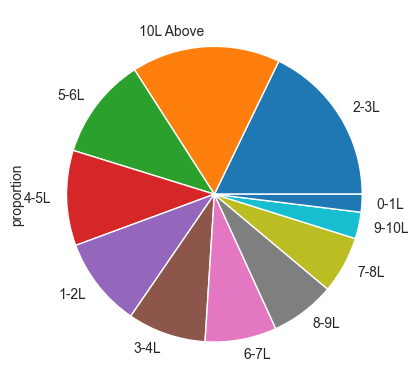

In [174]:
#plotting pie chart
appdata['loan_amt_range'].value_counts(normalize=True).plot.pie()
plt.show()

#### Observation:

- Compared to other loan amounts, most people have taken loan in group 2-3L and 10 lakh above.

In [175]:
#lets analyse what different client income types are doing
appdata.NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

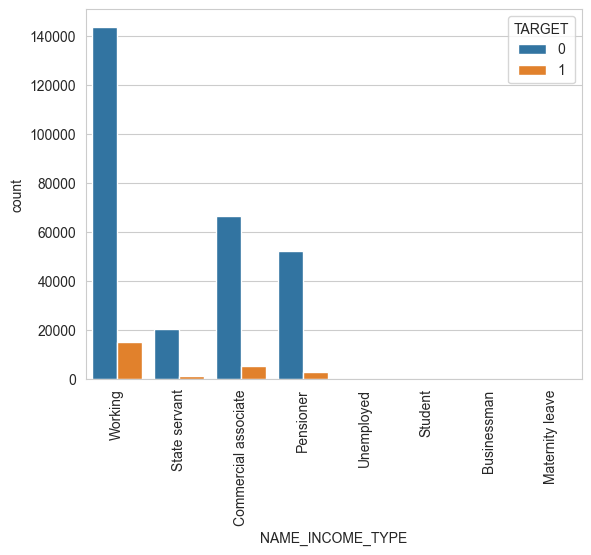

In [176]:
sns.countplot(data = appdata, x = "NAME_INCOME_TYPE", hue = "TARGET")
plt.xticks(rotation=90)
plt.show()

#### Observation:

- Working individuals continue to be decent citizens by repaying their loans.


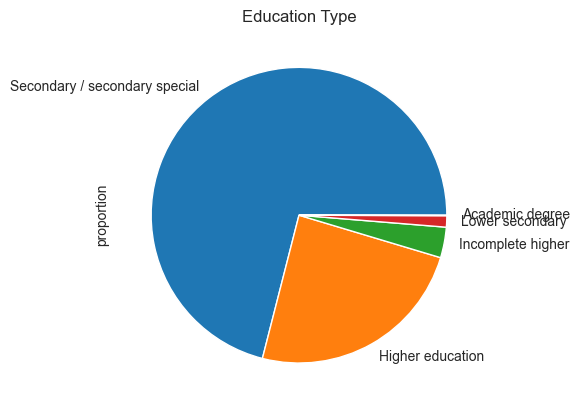

In [177]:
#Lets do analysis of education col
appdata.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.title('Education Type')
plt.show()

#### Observation:
One can observe that the majority of those who sought for loans had secondary or secondary special.


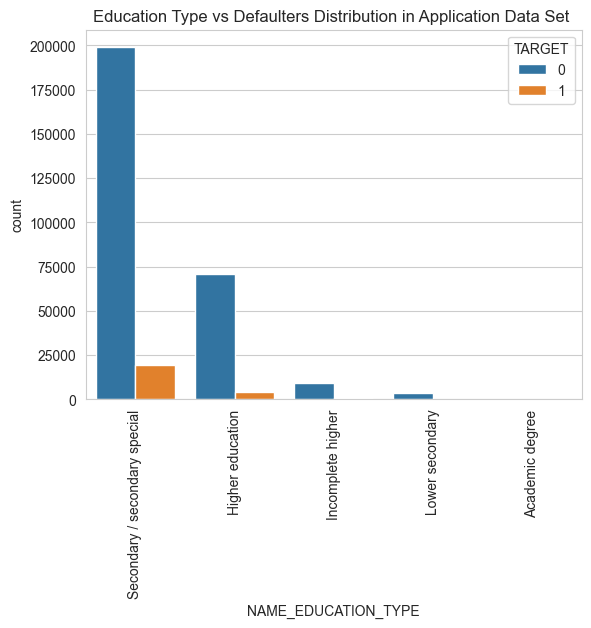

In [178]:
#Lets analysis with defaulter
sns.countplot(data = appdata, x = "NAME_EDUCATION_TYPE", hue = "TARGET")
plt.xticks(rotation=90)
plt.title("Education Type vs Defaulters Distribution in Application Data Set ")
plt.show()

#### Observation:

- Secondary and secondary special education students are the most effective group in avoiding default.


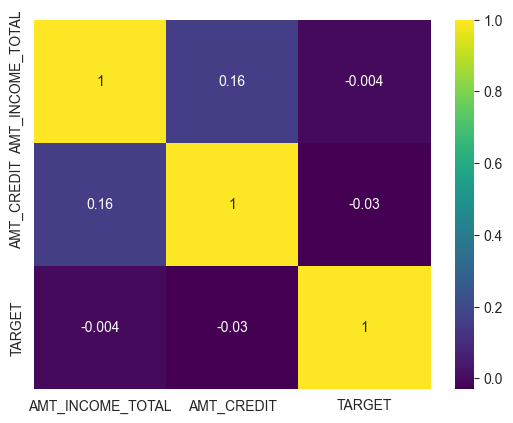

In [179]:
#Lets check correlation between credit and income
sns.heatmap( appdata[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'TARGET']].corr(), annot= True, cmap= "viridis")
#writing title

title = ('Correlation Between Credit And Income Of Applicants')
plt.show()

#### Observation:
Let's look at the logic/perception that is most common, which states that those with higher wages won't have any trouble repaying their loans.
But we also need to consider the credit limit of the loan. since those subjects are connected to and relevant to one another.


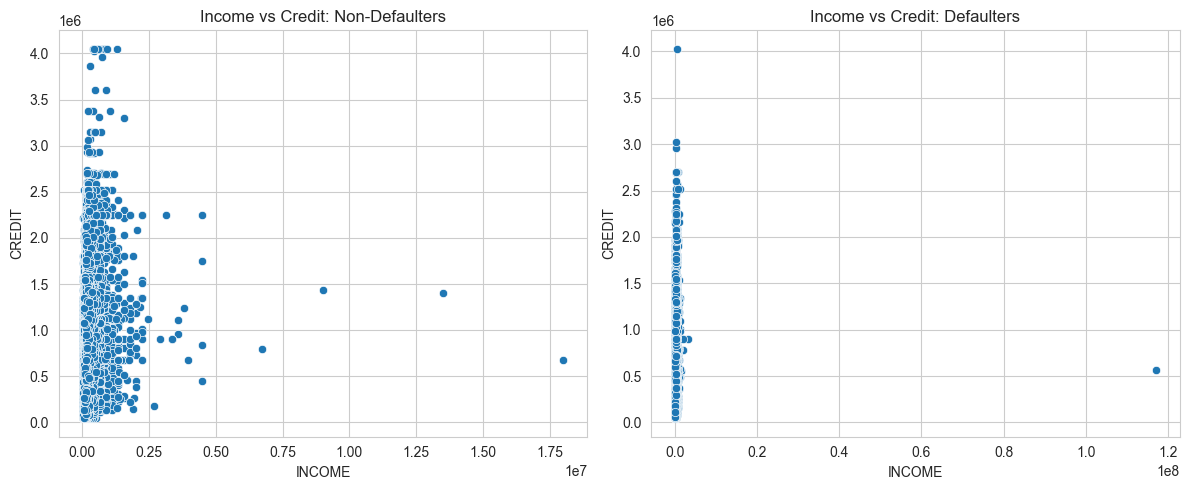

In [180]:
#Lets use scatter plot 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=appdata[appdata.TARGET == 0])
plt.xlabel('INCOME')
plt.ylabel('CREDIT')
plt.title('Income vs Credit: Non-Defaulters')

plt.subplot(1, 2, 2)
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=appdata[appdata.TARGET == 1])
plt.xlabel('INCOME')
plt.ylabel('CREDIT')
plt.title('Income vs Credit: Defaulters')

plt.tight_layout()
plt.show()


#### Observation:

- As the aforementioned data makes abundantly evident, persons with lower income ranges are more likely to default (loan quantity has little bearing on this).


We have performed the analysis for all the columns for which we think that they will give good information. Let's finish the rest of the columns(if any of them is important or not).


In [181]:
#Let's look at the columns of appdata
appdata.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'income_group', 'loan_amt_range'],
      dtype='object')

In [182]:
#Let's look at some other columns 

#Analyzing the NAME_TYPE_SUITE col , so checking whether it lies in categorical data or num col 
cat_col

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']

In [183]:
#working with NAME_TYPE_SUITE
appdata.NAME_TYPE_SUITE.value_counts()

NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

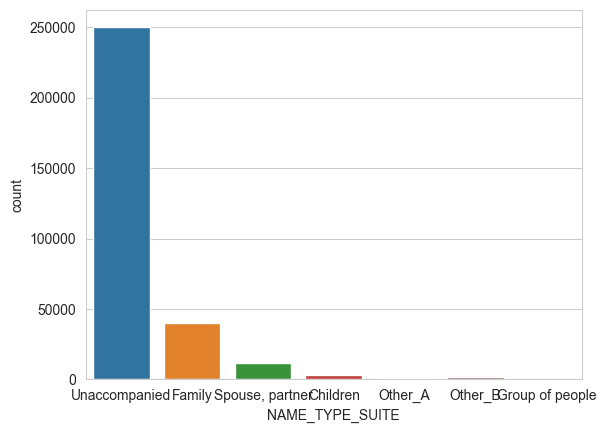

In [184]:
#plotting count plot 
sns.countplot(x='NAME_TYPE_SUITE',data=appdata)
plt.show()

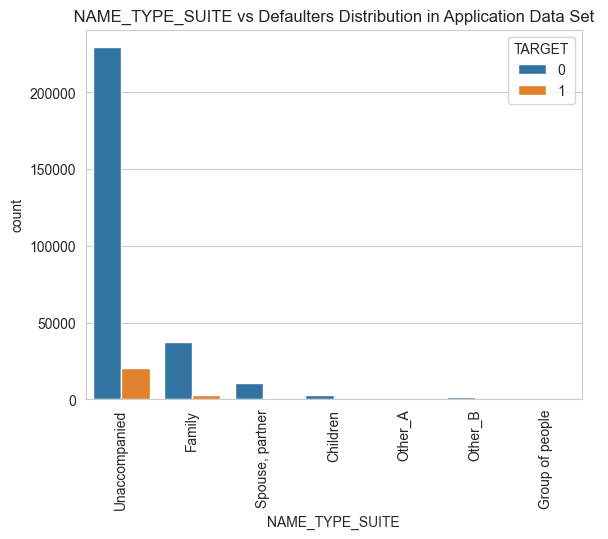

In [185]:
#Analyzing with defaulter
sns.countplot(data = appdata, x = "NAME_TYPE_SUITE", hue = "TARGET")
plt.xticks(rotation=90)
plt.title(" NAME_TYPE_SUITE vs Defaulters Distribution in Application Data Set ")
plt.show()

#### Observation:

- The applicants who applied alone default more frequently, yet they are also consistent. This could be as a result of the highest number of candidates being turned down.
- Less defaults are made by candidates who were accompanied by a spouse or partner when they applied.


In [186]:
#Looking into all the categorical column which we have as we think that we have done enough analysis on continuous data.
#looking into some cat data which may give us some important information
cat_col

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']

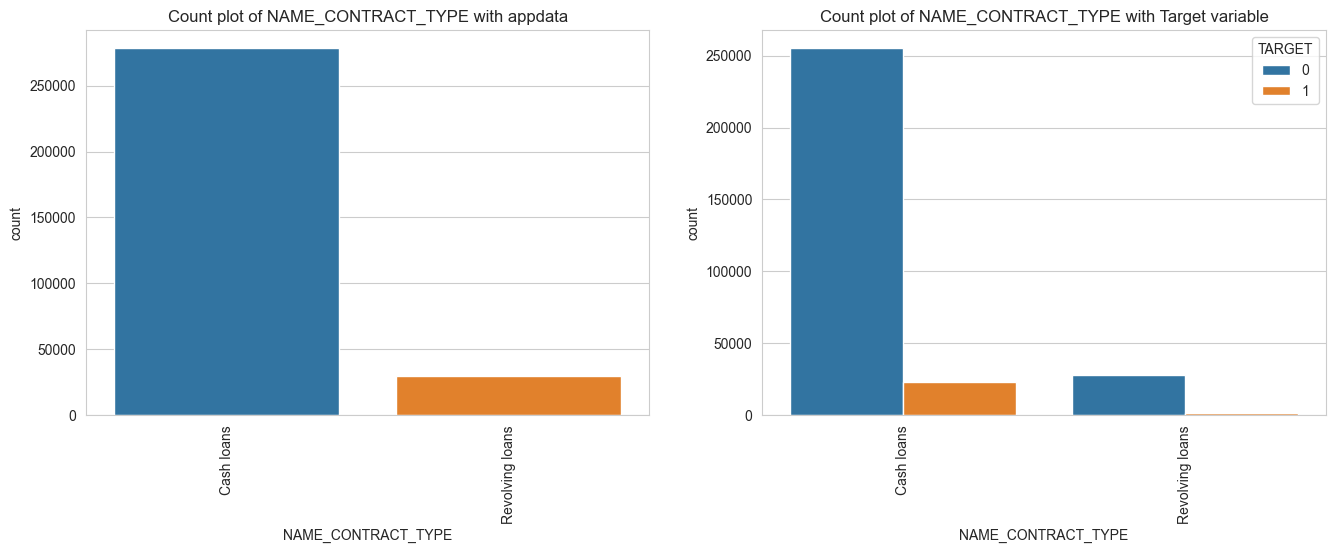

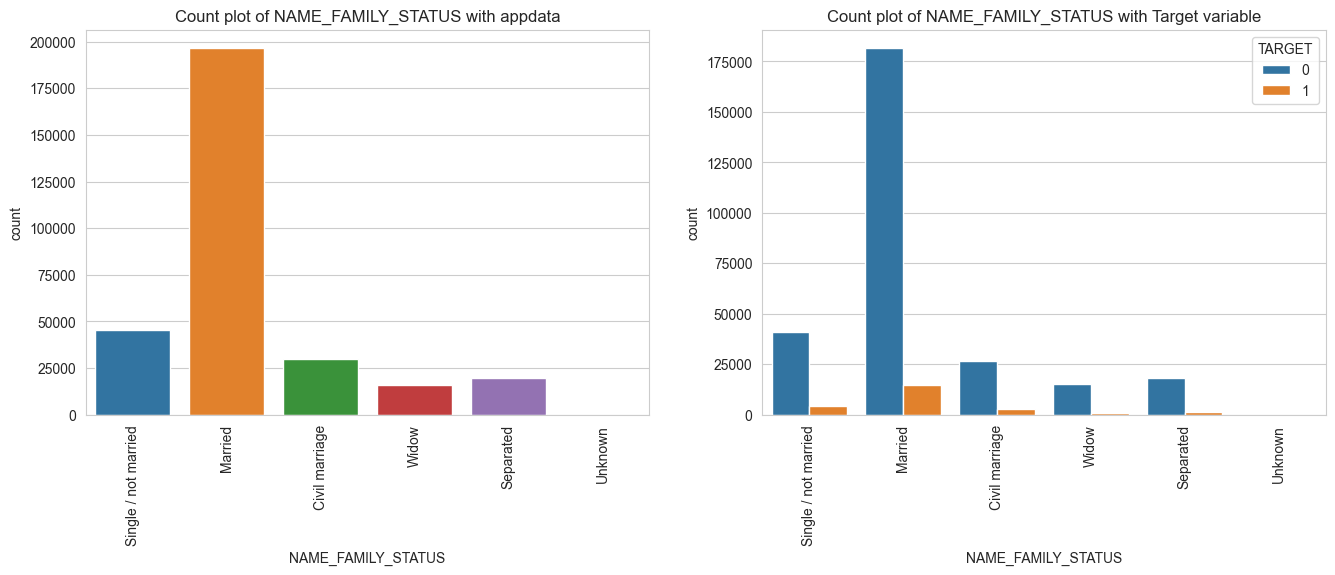

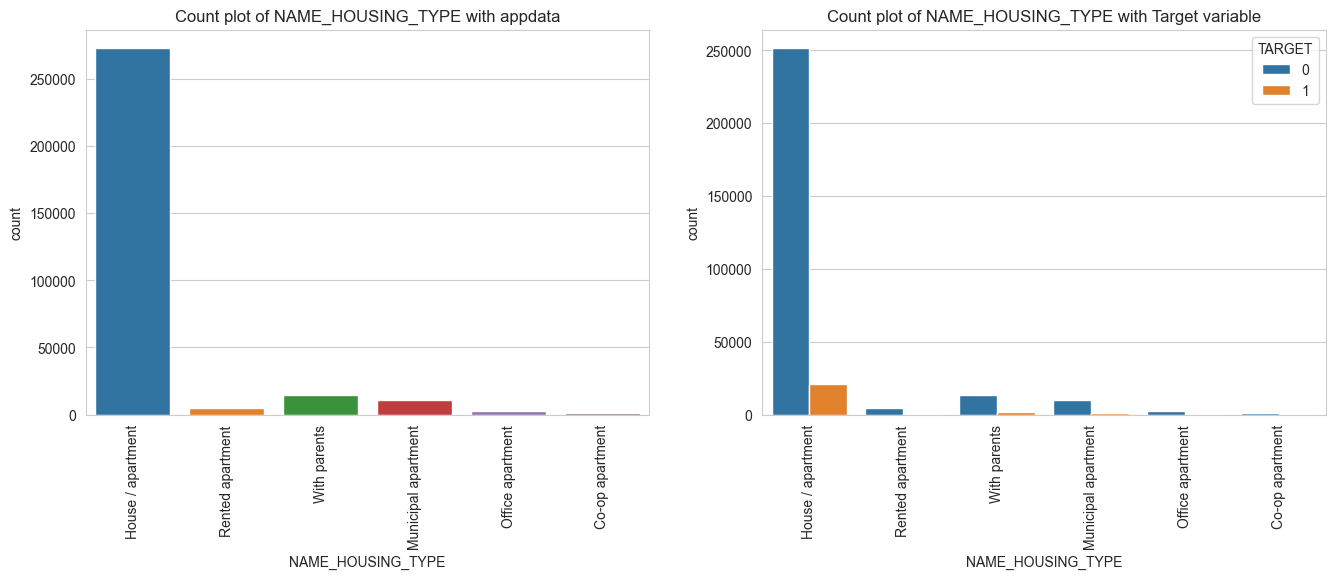

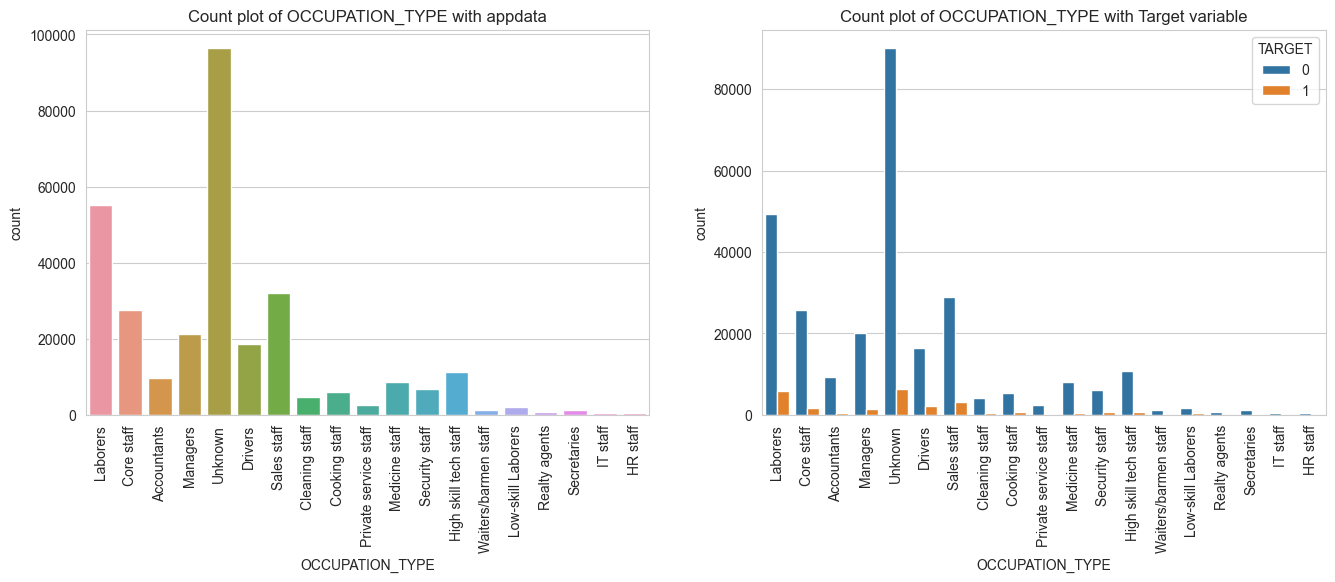

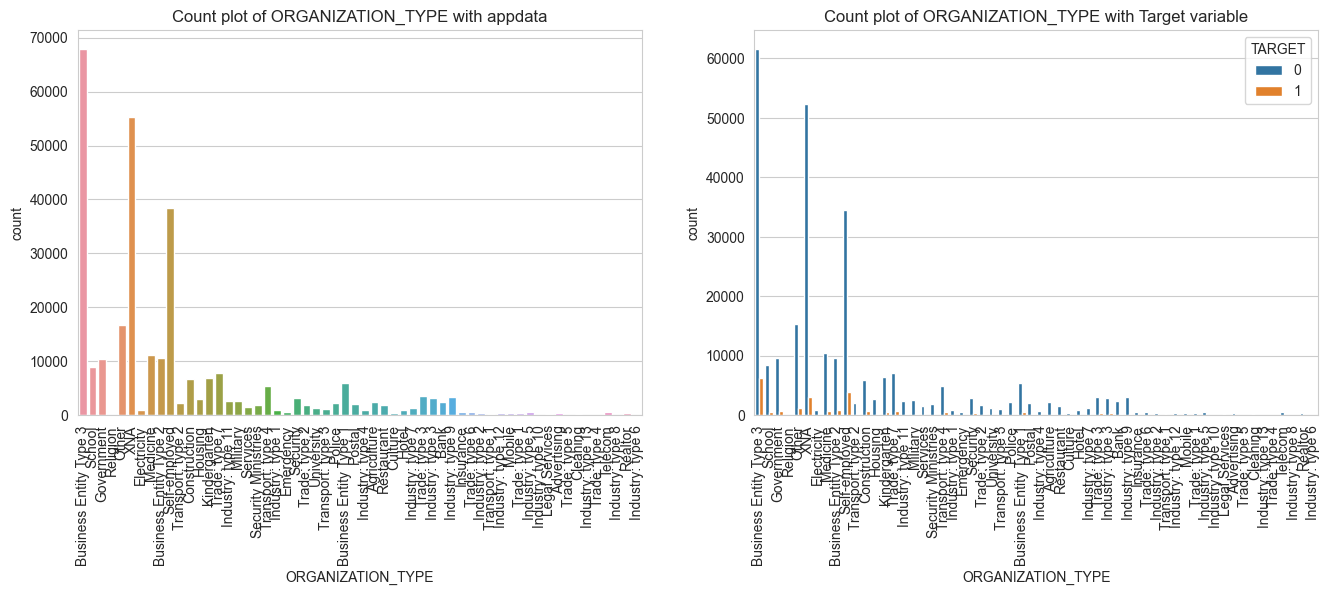

In [187]:
#Creating list of the name new_cat_col as we have already worked on some of the categorical columns.

new_cat_col=['NAME_CONTRACT_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE']


#Starting for loop and plotting countplot of the remaining categorical columns
for col in new_cat_col:
    # Adjust the overall figure size to fit 2x2 matrix
    plt.figure(figsize=(16, 12))  
    # Adjust the vertical spacing between subplots
    plt.subplots_adjust(hspace=0.4)  

    # Count plot of col with appdata
    plt.subplot(2, 2, 1)
    sns.countplot(x=appdata[col])
    plt.title(f'Count plot of {col} with appdata')
    plt.xticks(rotation=90)

    # Count plot of col with defaulter
    plt.subplot(2, 2, 2)
    sns.countplot(x=col, data=appdata, hue='TARGET')
    plt.title(f'Count plot of {col} with Target variable')
    plt.xticks(rotation=90)

    plt.show()

## Observations of the categorical columns

### NAME_CONTRACT_TYPE

This feature is a categorical variable that represents the type of contract. It can be one of: Cash or Revolving

- The countplot for NAME_CONTRACT_TYPE with appdata shows that the number of Cash loans is significantly higher than the number of Revolving loans.

- The countplot for NAME_CONTRACT_TYPE with TARGET shows that the Cash loan defaults more then Revolving loan. 

### NAME_FAMILY_STATUS

This feature is a categorical variable that represents Family status of the client

- The countplot for NAME_FAMILY_STATUS with appdata shows that the applicant who is married apply more
- The countplot for NAME_FAMILY_STATUS with TARGET shows that the applicant who is married defaults more and who have separated defaults least.

### NAME_HOUSING_TYPE

This feature is a categorical variable that represents What is the housing situation of the client (renting, living with parents ,etc)

- The applicants with housing situation House/ apartment apply more loans and defaults more may be because of the majority which lies in this status. 

### OCCUPATION_TYPE

This feature is a categorical variable that represent that What kind of occupation does the client have

- The occupation type unknown has the highest peak in the graph, which means the occupation of most of the applicants is unknown as we have filled the nulls with unknown so that null will not be able to hamper our analysis.
- The occupation type is unknown, and laborers default almost the same. As we don't know the unknown occupation, we will say that laborers default more.


### ORGANIZATION_TYPE

This feature is a categorical variable that represents Type of organization where client works.

- This shows that the Business Entity Type 3 has applied most for the loan.
- Business Entity Type 3 defaults more, followed by self-employed compared to others.



## Working on Previous Application Data set

In [188]:
#Looking into previous application dataset 
predata.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
#Let's look  the shape
print('The Previous Application data have ',predata.shape[0],'rows and columns are ',predata.shape[1])

The Previous Application data have  1670214 rows and columns are  37


In [190]:
#As we did in application data, now let's look into null of predata
predata.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [191]:
#Let's look for the nulls in percentage
(predata.isnull().mean()*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [192]:
#Setting up a cutoff of 40% and dropping all the column above this cutoff
cutoff=40
pre_col_drop=predata.columns[predata.isnull().mean()*100>cutoff]

#The number col which will be dropped
print(len(pre_col_drop))

11


In [193]:
#Dropping all the 11 columns
predata.drop(pre_col_drop,axis=1,inplace=True)

#New shape
print('The Previous Application data have ',predata.shape[0],'rows and columns are ',predata.shape[1])

The Previous Application data have  1670214 rows and columns are  26


In [194]:
#Checking missing value again and treating them accordingly 
(predata.isnull().mean()*100).sort_values(ascending=False)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

In [195]:
#Filling nan
#checking data type
predata.AMT_GOODS_PRICE.dtype

dtype('float64')

In [196]:
#as it is numerical column we will fill it with median or mean 
med=predata.AMT_GOODS_PRICE.median()

#filling na
predata.AMT_GOODS_PRICE.fillna(med,inplace=True)

#Checking null in col
predata.AMT_GOODS_PRICE.isnull().sum()

0

In [197]:
#checking data type
predata.AMT_ANNUITY.dtype

dtype('float64')

In [198]:
#as it is numerical column we will fill it with median or mean 
med=predata.AMT_ANNUITY.median()

#filling na
predata.AMT_ANNUITY.fillna(med,inplace=True)

#Checking null in col
predata.AMT_ANNUITY.isnull().sum()

0

In [199]:
#checking data type
predata.CNT_PAYMENT.dtype

dtype('float64')

In [200]:
#as it is numerical column we will fill it with median or mean 
med=predata.CNT_PAYMENT.median()

#filling na
predata.CNT_PAYMENT.fillna(med,inplace=True)

#Checking null in col
predata.CNT_PAYMENT.isnull().sum()

0

In [201]:
#checking data type
predata.PRODUCT_COMBINATION.dtype

dtype('O')

In [202]:
#as it is categorical column we will fill it with MODE 
mod=predata.PRODUCT_COMBINATION.mode()

#filling na
predata.PRODUCT_COMBINATION.fillna(mod,inplace=True)

#Checking null in col
predata.PRODUCT_COMBINATION.isnull().sum()

346

In [203]:
#checking data type
predata.AMT_CREDIT.dtype

dtype('float64')

In [204]:
#as it is numerical column we will fill it with meadian or mean 
me=predata.AMT_CREDIT.mean()

#filling na
predata.AMT_CREDIT.fillna(me,inplace=True)

#Checking null in col
predata.AMT_CREDIT.isnull().sum()

0

In [205]:
#final null value check of predata
predata.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_ANNUITY                      0
AMT_APPLICATION                  0
AMT_CREDIT                       0
AMT_GOODS_PRICE                  0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
CNT_PAYMENT                      0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

## Univarite and Bivarite

In [206]:
#lets see what are different types of contract product types are there
predata.NAME_CONTRACT_TYPE.value_counts()

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: count, dtype: int64

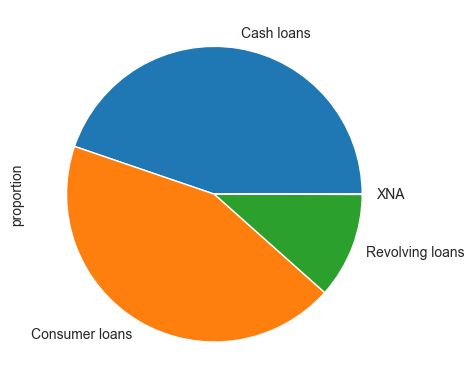

In [207]:
#plotting pie
predata.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.pie()
plt.show()

- "Consumer loans" and "Cash loans" make up a larger portion of contract categories by name.

In [208]:
#Just curious, It maybe random, but what day most people apply for loans.
predata.WEEKDAY_APPR_PROCESS_START.value_counts()

WEEKDAY_APPR_PROCESS_START
TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: count, dtype: int64

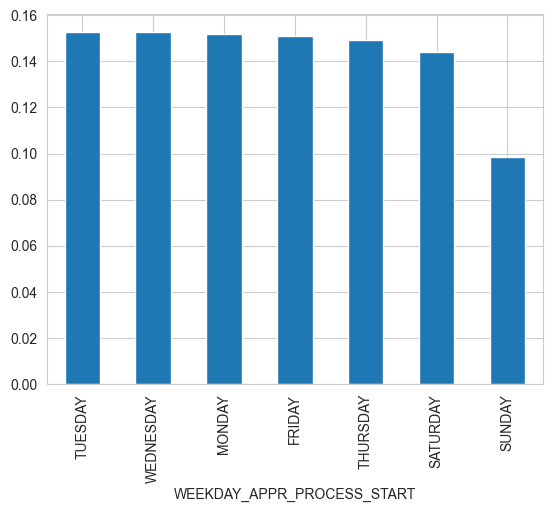

In [209]:
#lets say it visually in bar chart
predata.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.show()

- On Sundays, there are applications as well. Since banks operate in many time zones and nations, we lack country-specific data. Therefore, it is quite likely that the data set was exported in one timezone while the applicant's nation was in another.


In [210]:
#most common reasons for rejections
predata.CODE_REJECT_REASON.value_counts(normalize=True) * 100

CODE_REJECT_REASON
XAP       81.013152
HC        10.491530
LIMIT      3.333705
SCO        2.243245
CLIENT     1.582791
SCOFR      0.767027
XNA        0.313972
VERIF      0.211650
SYSTEM     0.042929
Name: proportion, dtype: float64

- The most common reason listed is "XAP," and after a internet search, we discovered that some people also list "XAP" for "Not Applicable" and "XNA" for "Not Available", so it's hard to say the reason . Therefore, it's possible that the majority of applications are turned down because of complex judgments that loan managers make based on their knowledge and gut instincts and that take a long time to type.


In [211]:
#Checking the type of applicants
predata.NAME_CLIENT_TYPE.value_counts(normalize=True) * 100

NAME_CLIENT_TYPE
Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: proportion, dtype: float64

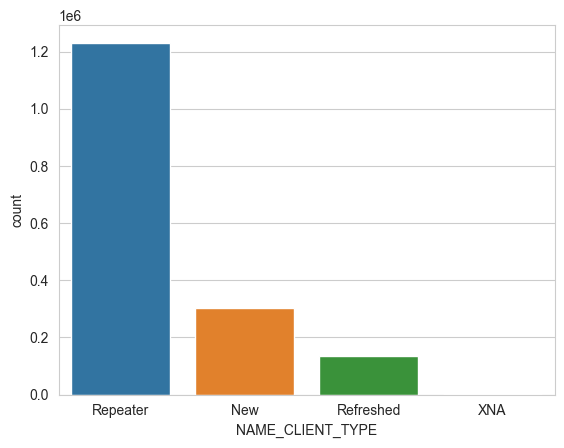

In [212]:
#Creating countplot
sns.countplot(x='NAME_CLIENT_TYPE',data=predata)
plt.show()

- The number of Repeater is high as the people apply again after there loan get approved or reject.


In [213]:
#Looking for repeater
predata[predata.NAME_CLIENT_TYPE == "Repeater"].NAME_CONTRACT_STATUS.value_counts()

NAME_CONTRACT_STATUS
Approved        657844
Canceled        292232
Refused         260860
Unused offer     20325
Name: count, dtype: int64

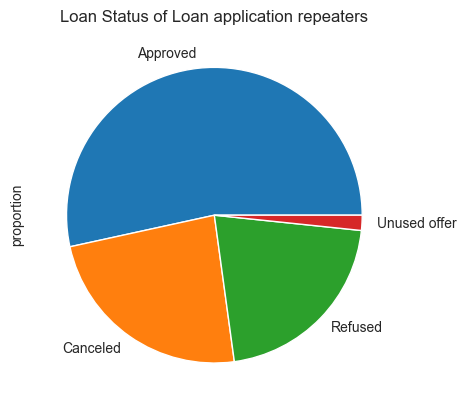

In [214]:
#Ploting pie
predata[predata.NAME_CLIENT_TYPE == "Repeater"].NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.pie()
plt.title("Loan Status of Loan application repeaters")
plt.show()

People continue to seek for loans after receiving one. Repeat customers typically receive loan approval.


In [215]:
#Purpose of loan
predata.NAME_CASH_LOAN_PURPOSE.value_counts()

NAME_CASH_LOAN_PURPOSE
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                          

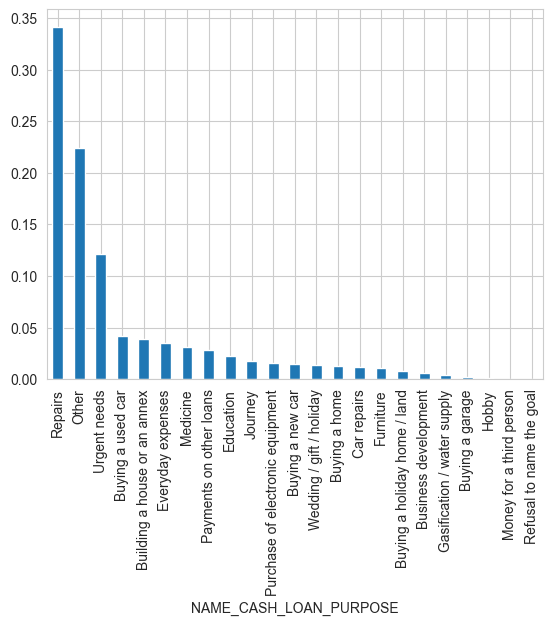

In [216]:
#plotting graph
predata[~predata.NAME_CASH_LOAN_PURPOSE.isin(['XNA', 'XAP'])].NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True).plot.bar()
plt.show()

- Most people get loan for repairs

## Merged Data set analysis

In [217]:
#Merging the datasets (Inner join)
#Lets merge the current application and previous application 
merged_data = pd.merge(left=appdata, right=predata, how='inner', on='SK_ID_CURR', suffixes=('_x', '_y'))


In [218]:
#Checking new shape 
print('The merged data set have ',merged_data.shape[0],'rows and the column is ',merged_data.shape[1])

The merged data set have  1413701 rows and the column is  61


In [219]:
#lets get info about the new data
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 61 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  object  
 3   CODE_GENDER                  1413701 non-null  object  
 4   FLAG_OWN_CAR                 1413701 non-null  object  
 5   FLAG_OWN_REALTY              1413701 non-null  object  
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413701 non-null  float64 
 10  AMT_GOODS_PRICE_x            1413701 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  object  
 12  NAME_INCOME_TYPE            

Text(0.5, 1.0, 'Distribution of Cash Loan Purposes by Contract Status (Combined Data Sets)')

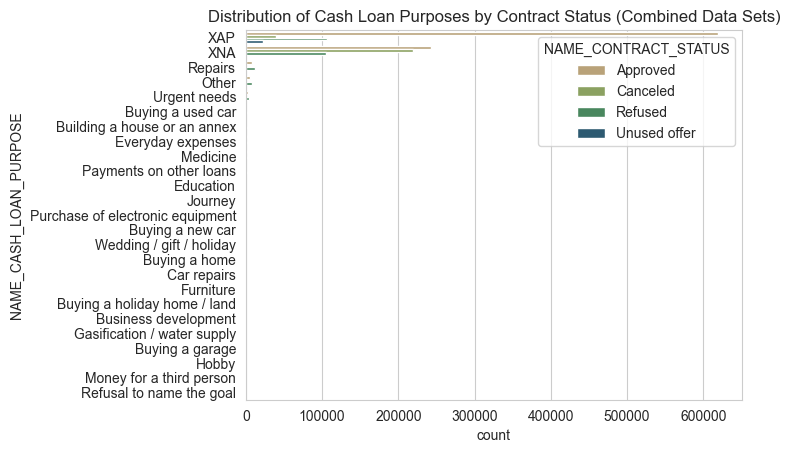

In [220]:
#Lets start checking things on combined data sets, lets do sample charting to see how the rows are doing related to data quality
sns.countplot(data = merged_data, y= 'NAME_CASH_LOAN_PURPOSE', order=merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue='NAME_CONTRACT_STATUS',palette='gist_earth_r')
plt.title('Distribution of Cash Loan Purposes by Contract Status (Combined Data Sets)')

In [221]:
#Dropping XNA and XAP 
merged_data.drop(merged_data[merged_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index,inplace=True)
merged_data.drop(merged_data[merged_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index,inplace=True)

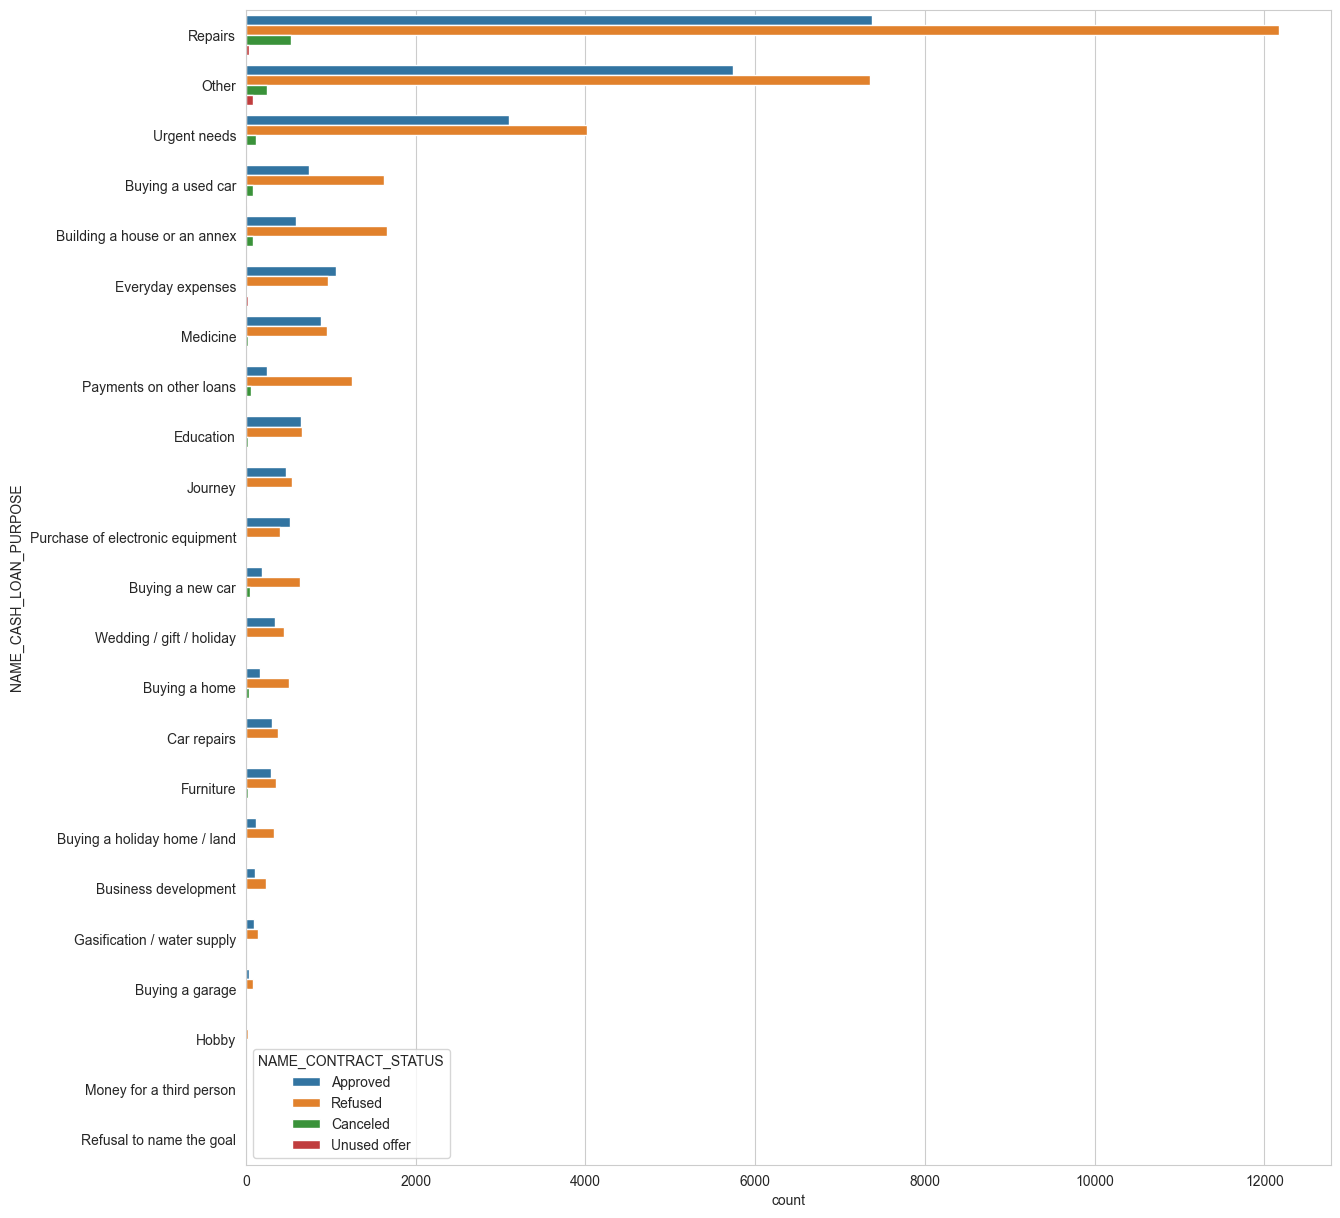

In [222]:
#Plotting chart
plt.figure(figsize=[14, 15])
sns.countplot(data = merged_data, y= 'NAME_CASH_LOAN_PURPOSE', order=merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue='NAME_CONTRACT_STATUS')
plt.show()

Repairs is the most common reason for loan rejection, and many applicants who don't include a reason for rejection appear to not take advantage of the offer.


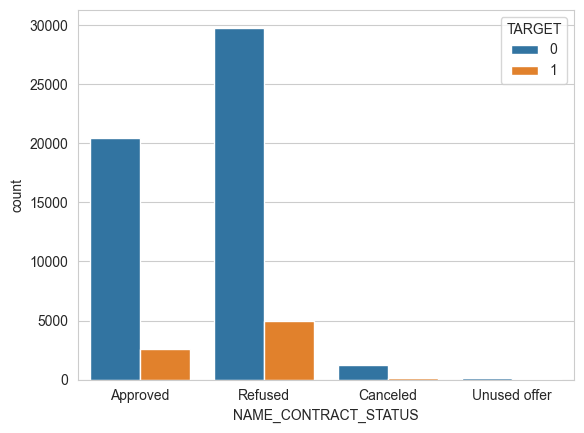

In [223]:
# Analysis TARGET and NAME_CONTRACT_STATUS
sns.countplot(data = merged_data, x = "NAME_CONTRACT_STATUS", hue = "TARGET")
plt.show()

The majority of defaulting clients are those whose prior applications were turned down.The best citizens, however, are also those whose prior applications were denied.


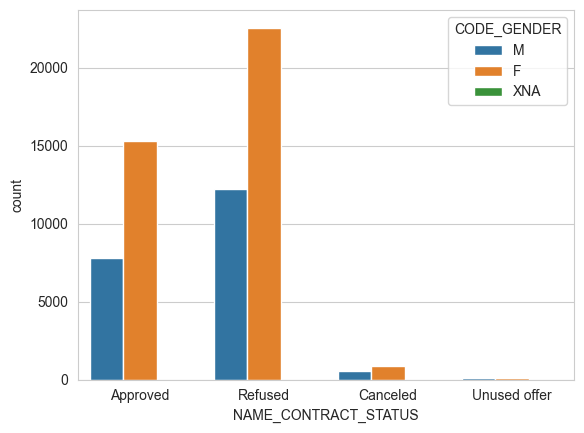

In [224]:
sns.countplot(data = merged_data, x = "NAME_CONTRACT_STATUS", hue = "CODE_GENDER")
plt.show()

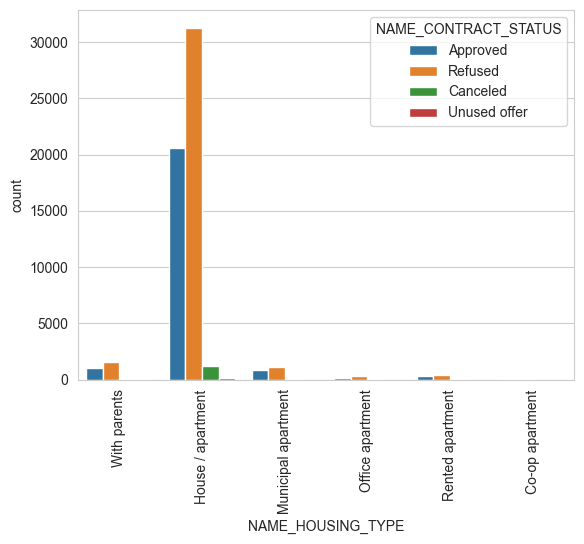

In [225]:
#Housing typw with respect to name contract status
sns.countplot(data = merged_data, x = "NAME_HOUSING_TYPE", hue = "NAME_CONTRACT_STATUS")
plt.xticks(rotation=90)
plt.show()

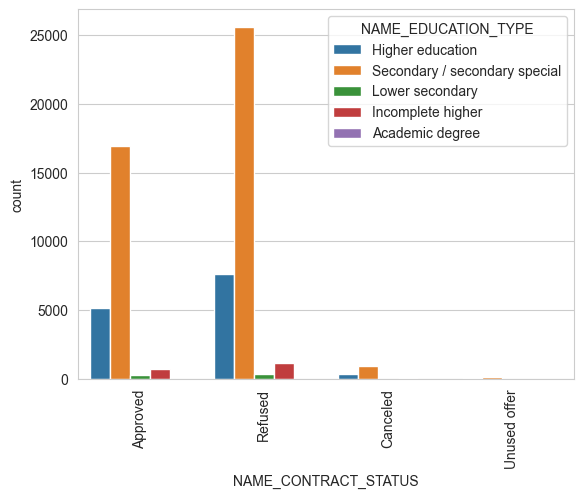

In [226]:
#NAME_CONTRACT_STATUS and NAME_EDUCATION_TYPE
sns.countplot(data = merged_data, x = "NAME_CONTRACT_STATUS", hue = "NAME_EDUCATION_TYPE")
plt.xticks(rotation=90)
plt.show()

## Conclusions

- Males are more prone than females to default on payments. In other words, women would make better loan recipients.
- Owners of cars are more likely than non-owners to default on their debts. May be because high maintenance. 
- Owners of immovable property, such as houses or apartments, are more likely to pay off their debt than those who do not.
- Less child-parenting clients are more likely to pay off their obligations.
- The most effective income group is that of those who wipe off their debts and earn between 1-1.5 lakh.
- Working individuals continue to be decent citizens by repaying their loans.
- Secondary and secondary special education students are the most effective group in avoiding default.
- More defaulters are the people with lower income range.
- Repeat customers typically receive loan approval. Keeping customers is therefore crucial.
- The majority of defaulting consumers are those whose prior applications were denied.







